In [19]:
import pandas as pd
import datetime

In [11]:
data = pd.read_csv('donnees-synop-essentielles-omm.csv', sep=';', low_memory=False)
data.columns

Index(['ID OMM station', 'Date', 'Pression au niveau mer',
       'Variation de pression en 3 heures', 'Type de tendance barométrique',
       'Direction du vent moyen 10 mn', 'Vitesse du vent moyen 10 mn',
       'Temperature', 'Point de rosée', 'Humidité', 'Visibilité horizontale',
       'Temps présent', 'Temps passé 1', 'Temps passé 2', 'Nebulosité totale',
       'Nébulosité  des nuages de l' étage inférieur',
       'Hauteur de la base des nuages de l'étage inférieur',
       'Type des nuages de l'étage inférieur',
       'Type des nuages de l'étage moyen',
       'Type des nuages de l'étage supérieur', 'Pression station',
       'Niveau barométrique', 'Géopotentiel',
       'Variation de pression en 24 heures',
       'Température minimale sur 12 heures',
       'Température minimale sur 24 heures',
       'Température maximale sur 12 heures',
       'Température maximale sur 24 heures',
       'Température minimale du sol sur 12 heures',
       'Méthode de mesure Température du

In [77]:
newData = pd.DataFrame({
    'Date': pd.to_datetime(data['Date'], infer_datetime_format=True),
    'IDStation': data['ID OMM station'],
    'Temperature': data['Temperature'] - 273,
    'Coordonnees': data['Coordonnees'],
    'NomLieu': data['Nom'],
    'VitesseVent': data['Vitesse du vent moyen 10 mn'],
    'Pluie1': data['Précipitations dans la dernière heure'],
    'Pluie3': data['Précipitations dans les 3 dernières heures'],
    'Pluie6': data['Précipitations dans les 6 dernières heures'],
    'Pluie12': data['Précipitations dans les 12 dernières heures'],
    'Pluie24': data['Précipitations dans les 24 dernières heures'],
    'Neige': data['Hauteur totale de la couche de neige, glace, autre au sol'],
    'NeigeFraiche': data['Hauteur de la neige fraîche']
})
newData.head()

,Date,IDStation,Temperature,Coordonnees,NomLieu,VitesseVent,Pluie1,Pluie3,Pluie6,Pluie12,Pluie24,Neige,NeigeFraiche
0,2018-08-08 09:00:00,7168,22.35,"48.324667, 4.02",TROYES-BARBEREY,3.2,0.0,0.0,0.0,10.2,10.2,0.0,NaN
1,2018-08-08 12:00:00,7037,22.65,"49.383, 1.181667",ROUEN-BOOS,4.7,0.0,0.0,0.0,0.0,4.2,0.0,NaN
2,2018-08-08 12:00:00,7149,25.65,"48.716833, 2.384333",ORLY,4.4,0.0,0.0,0.0,-0.1,-0.1,0.0,NaN
3,2018-08-08 12:00:00,7299,28.85,"47.614333, 7.51",BALE-MULHOUSE,3.7,0.0,0.0,0.0,0.2,0.2,0.0,0.0
4,2018-08-08 12:00:00,7630,27.75,"43.621, 1.378833",TOULOUSE-BLAGNAC,2.2,0.0,0.0,0.0,0.0,-0.1,0.0,NaN


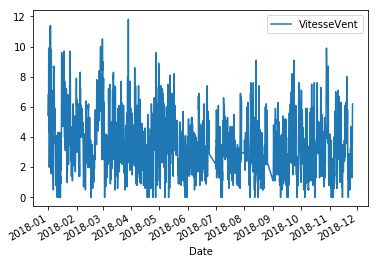

In [89]:
newData[(newData.IDStation == 7149) & (newData.Date > '2018-01-01')].plot('Date', 'VitesseVent')

In [85]:
newData.to_csv('newData.csv')